In [1]:
import MDAnalysis
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.patches as mpatches
import warnings

warnings.filterwarnings('ignore')

/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/chemfiles.py:82: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion
/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [2]:
MalE_open_r0_647_647 = np.load('results_MalE_open_r0_647_647.npy', allow_pickle=True)
MalE_open_r0_647_647_df = pd.DataFrame.from_records(MalE_open_r0_647_647)

MalE_open_el_off = np.load('results_MalE_open_el_off.npy', allow_pickle=True)
MalE_open_el_off_df = pd.DataFrame.from_records(MalE_open_el_off)

MalE_open_647_L1R = np.load('results_MalE_open_different_probe.npy', allow_pickle=True)
MalE_open_647_L1R_df = pd.DataFrame.from_records(MalE_open_647_L1R)

MalE_open_350_C1R = np.load('results_MalE_350_C1R.npy', allow_pickle=True)
MalE_open_350_C1R_df = pd.DataFrame.from_records(MalE_open_350_C1R)

MalE_open_350_L1R = np.load('results_MalE_350_L1R.npy', allow_pickle=True)
MalE_open_350_L1R_df = pd.DataFrame.from_records(MalE_open_350_L1R)

In [3]:
# MalE con R0 corretto tra AF647-AF647
MalE_open_r0_647_647_res = np.tile(MalE_open_r0_647_647_df['res'], 5)
MalE_open_r0_647_647_Eavg = np.array(MalE_open_r0_647_647_df['E_avg'])
MalE_open_r0_647_647_Ex = np.array(MalE_open_r0_647_647_df['Ex'])
MalE_open_r0_647_647_Es = np.array(MalE_open_r0_647_647_df['Es'])
MalE_open_r0_647_647_Ed = np.array(MalE_open_r0_647_647_df['Ed'])
MalE_open_r0_647_647_Ed2 = np.array(MalE_open_r0_647_647_df['Ed2'])
MalE_open_r0_647_647_allE = np.concatenate([MalE_open_r0_647_647_Ex, 
                                 MalE_open_r0_647_647_Es, MalE_open_r0_647_647_Ed, 
                                 MalE_open_r0_647_647_Ed2, MalE_open_r0_647_647_Eavg])
MalE_open_r0_647_647_cutoff = np.tile(np.array(MalE_open_r0_647_647_df['cutoff']), 5)
MalE_open_r0_647_647_name = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_open_r0_647_647_Es))
MalE_open_r0_647_647_protein = np.repeat('MalE', len(MalE_open_r0_647_647_allE))
MalE_open_r0_647_647_conformation = np.repeat('A', len(MalE_open_r0_647_647_allE))
MalE_open_r0_647_647_comparison = np.repeat('R0', len(MalE_open_r0_647_647_allE))
MalE_open_r0_647_647_all_df = pd.DataFrame({'E': MalE_open_r0_647_647_allE, 'Method': MalE_open_r0_647_647_name, 
                             'cutoff': MalE_open_r0_647_647_cutoff, 'res': MalE_open_r0_647_647_res, 
                             'protein': MalE_open_r0_647_647_protein, 
                             'conformation': MalE_open_r0_647_647_conformation, 
                             'comparison':MalE_open_r0_647_647_comparison})

# MalE con R0 sperimentale
results_MalE_open = np.load('results_MalE_open.npy', allow_pickle=True)
results_MalE_open_df = pd.DataFrame.from_records(results_MalE_open)

MalE_open_Eavg_cutoff = np.array(results_MalE_open_df.groupby('res', sort=False).mean()['E_avg'])
MalE_open_Eavg_cutoff = np.tile(MalE_open_Eavg_cutoff, 3)
MalE_open_res = np.tile(results_MalE_open_df['res'], 6)
MalE_open_Eavg = np.array(results_MalE_open_df['E_avg'])
MalE_open_Ex = np.array(results_MalE_open_df['Ex'])
MalE_open_Es = np.array(results_MalE_open_df['Es'])
MalE_open_Ed = np.array(results_MalE_open_df['Ed'])
MalE_open_Ed2 = np.array(results_MalE_open_df['Ed2'])
MalE_open_allE = np.concatenate([MalE_open_Ex, MalE_open_Eavg_cutoff, 
                                 MalE_open_Es, MalE_open_Ed, 
                                 MalE_open_Ed2, MalE_open_Eavg])
MalE_open_cutoff = np.tile(np.array(results_MalE_open_df['cutoff']), 6)
MalE_open_name = np.repeat(['Ex', 'Eavg_cutoff', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_open_Es))
MalE_open_protein = np.repeat('MalE', len(MalE_open_allE))
MalE_open_conformation = np.repeat('B', len(MalE_open_allE))
MalE_open_comparison = np.repeat('R0', len(MalE_open_allE))
MalE_open_all_df = pd.DataFrame({'E': MalE_open_allE, 'Method': MalE_open_name, 
                             'cutoff': MalE_open_cutoff, 'res': MalE_open_res, 
                             'protein': MalE_open_protein, 
                             'conformation': MalE_open_conformation, 
                             'comparison': MalE_open_comparison})

res_MalE_open = np.array(results_MalE_open_df.loc[results_MalE_open_df['cutoff'] == 10]['res'])   

MalE_df = pd.concat([MalE_open_all_df, MalE_open_r0_647_647_all_df], ignore_index=True)

In [4]:
# Electrostatic = OFF
MalE_open_el_off_res = np.tile(MalE_open_el_off_df['res'], 5)
MalE_open_el_off_Eavg = np.array(MalE_open_el_off_df['E_avg'])
MalE_open_el_off_Ex = np.array(MalE_open_el_off_df['Ex'])
MalE_open_el_off_Es = np.array(MalE_open_el_off_df['Es'])
MalE_open_el_off_Ed = np.array(MalE_open_el_off_df['Ed'])
MalE_open_el_off_Ed2 = np.array(MalE_open_el_off_df['Ed2'])
MalE_open_el_off_allE = np.concatenate([MalE_open_el_off_Ex, 
                                 MalE_open_el_off_Es, MalE_open_el_off_Ed, 
                                 MalE_open_el_off_Ed2, MalE_open_el_off_Eavg])
MalE_open_el_off_cutoff = np.tile(np.array(MalE_open_el_off_df['cutoff']), 5)
MalE_open_el_off_name = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_open_el_off_Es))
MalE_open_el_off_protein = np.repeat('MalE', len(MalE_open_el_off_allE))
MalE_open_el_off_conformation = np.repeat('A', len(MalE_open_el_off_allE))
MalE_open_el_off_comparison= np.repeat('Electrostatic', len(MalE_open_el_off_allE))
MalE_open_el_off_all_df = pd.DataFrame({'E': MalE_open_el_off_allE, 'Method': MalE_open_el_off_name, 
                             'cutoff': MalE_open_el_off_cutoff, 'res': MalE_open_el_off_res, 
                             'protein': MalE_open_el_off_protein, 
                             'conformation': MalE_open_el_off_conformation, 
                             'comparison': MalE_open_el_off_comparison})

# Electrostatic = ON
results_MalE_open = np.load('results_MalE_open.npy', allow_pickle=True)
results_MalE_open_df = pd.DataFrame.from_records(results_MalE_open)

MalE_open_Eavg_cutoff = np.array(results_MalE_open_df.groupby('res', sort=False).mean()['E_avg'])
MalE_open_Eavg_cutoff = np.tile(MalE_open_Eavg_cutoff, 3)
MalE_open_res = np.tile(results_MalE_open_df['res'], 6)
MalE_open_Eavg = np.array(results_MalE_open_df['E_avg'])
MalE_open_Ex = np.array(results_MalE_open_df['Ex'])
MalE_open_Es = np.array(results_MalE_open_df['Es'])
MalE_open_Ed = np.array(results_MalE_open_df['Ed'])
MalE_open_Ed2 = np.array(results_MalE_open_df['Ed2'])
MalE_open_allE = np.concatenate([MalE_open_Ex, MalE_open_Eavg_cutoff, 
                                 MalE_open_Es, MalE_open_Ed, 
                                 MalE_open_Ed2, MalE_open_Eavg])
MalE_open_cutoff = np.tile(np.array(results_MalE_open_df['cutoff']), 6)
MalE_open_name = np.repeat(['Ex', 'Eavg_cutoff', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_open_Es))
MalE_open_protein = np.repeat('MalE', len(MalE_open_allE))
MalE_open_conformation = np.repeat('B', len(MalE_open_allE))
MalE_open_comparison = np.repeat('Electrostatic', len(MalE_open_allE))
MalE_open_df = pd.DataFrame({'E': MalE_open_allE, 'Method': MalE_open_name, 
                             'cutoff': MalE_open_cutoff, 'res': MalE_open_res, 
                             'protein': MalE_open_protein, 
                             'conformation': MalE_open_conformation, 
                             'comparison': MalE_open_comparison})

MalE_el_df = pd.concat([MalE_open_df, MalE_open_el_off_all_df], ignore_index=True)

In [5]:
# Donor = AlexaFluor 647 L1R
MalE_open_647_L1R_res = np.tile(MalE_open_647_L1R_df['res'], 5)
MalE_open_647_L1R_Eavg = np.array(MalE_open_647_L1R_df['E_avg'])
MalE_open_647_L1R_Ex = np.array(MalE_open_647_L1R_df['Ex'])
MalE_open_647_L1R_Es = np.array(MalE_open_647_L1R_df['Es'])
MalE_open_647_L1R_Ed = np.array(MalE_open_647_L1R_df['Ed'])
MalE_open_647_L1R_Ed2 = np.array(MalE_open_647_L1R_df['Ed2'])
MalE_open_647_L1R_allE = np.concatenate([MalE_open_647_L1R_Ex, 
                                 MalE_open_647_L1R_Es, MalE_open_647_L1R_Ed, 
                                 MalE_open_647_L1R_Ed2, MalE_open_647_L1R_Eavg])
MalE_open_647_L1R_cutoff = np.tile(np.array(MalE_open_647_L1R_df['cutoff']), 5)
MalE_open_647_L1R_name = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_open_647_L1R_Es))
MalE_open_647_L1R_protein = np.repeat('MalE', len(MalE_open_647_L1R_allE))
MalE_open_647_L1R_conformation = np.repeat('B', len(MalE_open_647_L1R_allE))
MalE_open_647_L1R_comparison = np.repeat('Fluorophore', len(MalE_open_647_L1R_allE))
MalE_open_647_L1R_all_df = pd.DataFrame({'E': MalE_open_647_L1R_allE, 'Method': MalE_open_647_L1R_name, 
                             'cutoff': MalE_open_647_L1R_cutoff, 'res': MalE_open_647_L1R_res, 
                             'protein': MalE_open_647_L1R_protein, 
                             'conformation': MalE_open_647_L1R_conformation, 
                             'comparison': MalE_open_647_L1R_comparison})

# Donor = AlexaFluor 350 C1R
MalE_open_350_C1R_res = np.tile(MalE_open_350_C1R_df['res'], 5)
MalE_open_350_C1R_Eavg = np.array(MalE_open_350_C1R_df['E_avg'])
MalE_open_350_C1R_Ex = np.array(MalE_open_350_C1R_df['Ex'])
MalE_open_350_C1R_Es = np.array(MalE_open_350_C1R_df['Es'])
MalE_open_350_C1R_Ed = np.array(MalE_open_350_C1R_df['Ed'])
MalE_open_350_C1R_Ed2 = np.array(MalE_open_350_C1R_df['Ed2'])
MalE_open_350_C1R_allE = np.concatenate([MalE_open_350_C1R_Ex, 
                                 MalE_open_350_C1R_Es, MalE_open_350_C1R_Ed, 
                                 MalE_open_350_C1R_Ed2, MalE_open_350_C1R_Eavg])
MalE_open_350_C1R_cutoff = np.tile(np.array(MalE_open_350_C1R_df['cutoff']), 5)
MalE_open_350_C1R_name = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_open_350_C1R_Es))
MalE_open_350_C1R_protein = np.repeat('MalE', len(MalE_open_350_C1R_allE))
MalE_open_350_C1R_conformation = np.repeat('C', len(MalE_open_350_C1R_allE))
MalE_open_350_C1R_comparison = np.repeat('Fluorophore', len(MalE_open_350_C1R_allE))
MalE_open_350_C1R_all_df = pd.DataFrame({'E': MalE_open_350_C1R_allE, 'Method': MalE_open_350_C1R_name, 
                             'cutoff': MalE_open_350_C1R_cutoff, 'res': MalE_open_350_C1R_res, 
                             'protein': MalE_open_350_C1R_protein, 
                             'conformation': MalE_open_350_C1R_conformation, 
                             'comparison': MalE_open_350_C1R_comparison})

# Donor = AlexaFluor 350 L1R
MalE_open_350_L1R_res = np.tile(MalE_open_350_L1R_df['res'], 5)
MalE_open_350_L1R_Eavg = np.array(MalE_open_350_L1R_df['E_avg'])
MalE_open_350_L1R_Ex = np.array(MalE_open_350_L1R_df['Ex'])
MalE_open_350_L1R_Es = np.array(MalE_open_350_L1R_df['Es'])
MalE_open_350_L1R_Ed = np.array(MalE_open_350_L1R_df['Ed'])
MalE_open_350_L1R_Ed2 = np.array(MalE_open_350_L1R_df['Ed2'])
MalE_open_350_L1R_allE = np.concatenate([MalE_open_350_L1R_Ex, 
                                 MalE_open_350_L1R_Es, MalE_open_350_L1R_Ed, 
                                 MalE_open_350_L1R_Ed2, MalE_open_350_L1R_Eavg])
MalE_open_350_L1R_cutoff = np.tile(np.array(MalE_open_350_L1R_df['cutoff']), 5)
MalE_open_350_L1R_name = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_open_350_L1R_Es))
MalE_open_350_L1R_protein = np.repeat('MalE', len(MalE_open_350_L1R_allE))
MalE_open_350_L1R_conformation = np.repeat('D', len(MalE_open_350_L1R_allE))
MalE_open_350_L1R_comparison = np.repeat('Fluorophore', len(MalE_open_350_L1R_allE))
MalE_open_350_L1R_all_df = pd.DataFrame({'E': MalE_open_350_L1R_allE, 'Method': MalE_open_350_L1R_name, 
                             'cutoff': MalE_open_350_L1R_cutoff, 'res': MalE_open_350_L1R_res, 
                             'protein': MalE_open_350_L1R_protein, 
                             'conformation': MalE_open_350_L1R_conformation, 
                             'comparison': MalE_open_350_L1R_comparison})

# Donor = AlexaFluor 647 C2R
results_MalE_open = np.load('results_MalE_open.npy', allow_pickle=True)
results_MalE_open_df = pd.DataFrame.from_records(results_MalE_open)

MalE_open_Eavg_cutoff = np.array(results_MalE_open_df.groupby('res', sort=False).mean()['E_avg'])
MalE_open_Eavg_cutoff = np.tile(MalE_open_Eavg_cutoff, 3)
MalE_open_res = np.tile(results_MalE_open_df['res'], 6)
MalE_open_Eavg = np.array(results_MalE_open_df['E_avg'])
MalE_open_Ex = np.array(results_MalE_open_df['Ex'])
MalE_open_Es = np.array(results_MalE_open_df['Es'])
MalE_open_Ed = np.array(results_MalE_open_df['Ed'])
MalE_open_Ed2 = np.array(results_MalE_open_df['Ed2'])
MalE_open_allE = np.concatenate([MalE_open_Ex, MalE_open_Eavg_cutoff, 
                                 MalE_open_Es, MalE_open_Ed, 
                                 MalE_open_Ed2, MalE_open_Eavg])
MalE_open_cutoff = np.tile(np.array(results_MalE_open_df['cutoff']), 6)
MalE_open_name = np.repeat(['Ex', 'Eavg_cutoff', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_open_Es))
MalE_open_protein = np.repeat('MalE', len(MalE_open_allE))
MalE_open_conformation = np.repeat('A', len(MalE_open_allE))
MalE_open_comparison = np.repeat('Fluorophore', len(MalE_open_allE))
MalE_open_all_df = pd.DataFrame({'E': MalE_open_allE, 'Method': MalE_open_name, 
                             'cutoff': MalE_open_cutoff, 'res': MalE_open_res, 
                             'protein': MalE_open_protein, 
                             'conformation': MalE_open_conformation, 
                             'comparison': MalE_open_comparison})

MalE_steric_df = pd.concat([MalE_open_all_df, MalE_open_647_L1R_all_df, MalE_open_350_C1R_all_df, MalE_open_350_L1R_all_df], 
                           ignore_index=True)

In [6]:
MalE_comparison_df = pd.concat([MalE_df, MalE_el_df, MalE_steric_df], ignore_index=True)

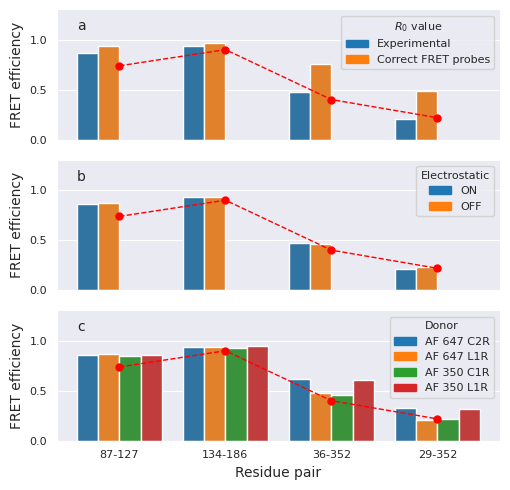

In [7]:
sns.set_style('darkgrid')

g = sns.catplot(data=MalE_comparison_df.loc[(MalE_comparison_df['cutoff'] == 10) & 
                                            (MalE_comparison_df['Method'] == 'Average')], 
                x='res', y='E', row='comparison', hue='conformation',
                sharey=False, sharex=True, 
                kind="bar", legend=False)

g.fig.set_size_inches(5.2, 5)

ax = g.axes

ax[0, 0].errorbar(res_MalE_open, MalE_open_Ex[0:len(res_MalE_open)], linewidth=1, 
                  marker='.', markersize=10, linestyle='dashed', color='red');

ax[0, 0].text(-0.4, 1.1, "a",fontsize=10)

ax[1, 0].errorbar(res_MalE_open, MalE_open_Ex[0:len(res_MalE_open)], linewidth=1, 
                  marker='.', markersize=10, linestyle='dashed', color='red');

ax[1, 0].text(-0.4, 1.1, "b",fontsize=10)

ax[2, 0].errorbar(res_MalE_open, MalE_open_Ex[0:len(res_MalE_open)], linewidth=1, 
                  marker='.', markersize=10, linestyle='dashed', color='red');

ax[2, 0].text(-0.4, 1.1, "c",fontsize=10)


for col in [0, 1, 2]:
    
    ax[col, 0].set_xlabel('Residue pair', fontsize=10)
    
    for label in (ax[col, 0].get_xticklabels() + ax[col, 0].get_yticklabels()):
        label.set_fontsize(8)
        
ax[0, 0].set_ylabel('FRET efficiency', fontsize=10)  
ax[1, 0].set_ylabel('FRET efficiency', fontsize=10)  
ax[2, 0].set_ylabel('FRET efficiency', fontsize=10)  

ax[0, 0].set_title('', fontsize=8)
ax[1, 0].set_title('', fontsize=8)
ax[2, 0].set_title('', fontsize=8)

blue_patch = mpatches.Patch(color=sns.color_palette("tab10")[0])
orange_patch = mpatches.Patch(color=sns.color_palette("tab10")[1])
green_patch = mpatches.Patch(color=sns.color_palette("tab10")[2])
red_patch = mpatches.Patch(color=sns.color_palette("tab10")[3])

ax[0, 0].legend(title='$R_0$ value', fontsize=8, title_fontsize=8, handles=[blue_patch, orange_patch],
                labels=['Experimental', 'Correct FRET probes'])

ax[1, 0].legend(title='Electrostatic', fontsize=8, title_fontsize=8, handles=[blue_patch, orange_patch],
                labels=['ON', 'OFF'])

ax[2, 0].legend(title='Donor', fontsize=8, title_fontsize=8, 
                handles=[blue_patch, orange_patch, green_patch, red_patch],
                labels=['AF 647 C2R', 'AF 647 L1R', 'AF 350 C1R', 'AF 350 L1R'])


ax[0, 0].set_ylim([0, 1.3])
ax[1, 0].set_ylim([0, 1.3])
ax[2, 0].set_ylim([0, 1.3])

g.tight_layout();

# g.figure.savefig('FRETpredict_MalE_comparison.eps')